In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [11]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text = "ABCDE",org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
    return blank_img

In [12]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")


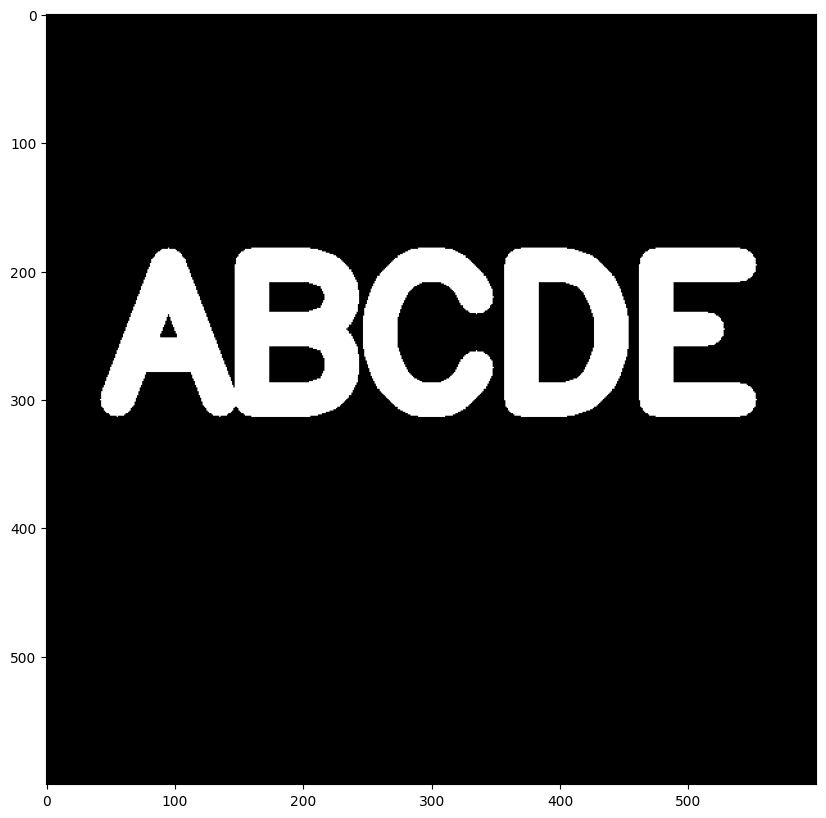

In [16]:
img = load_img()
display_img(img)

In [17]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

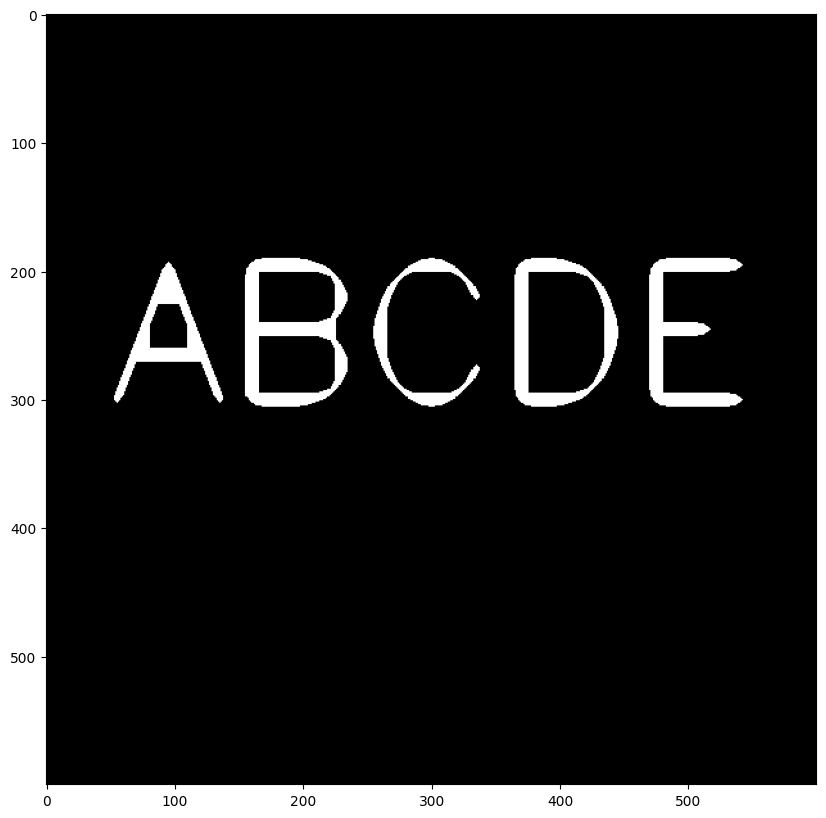

In [18]:
result =cv2.erode(img,kernel,iterations=4)
display_img(result)

In [19]:
img = load_img()
white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise

array([[0, 1, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 0, 1]])

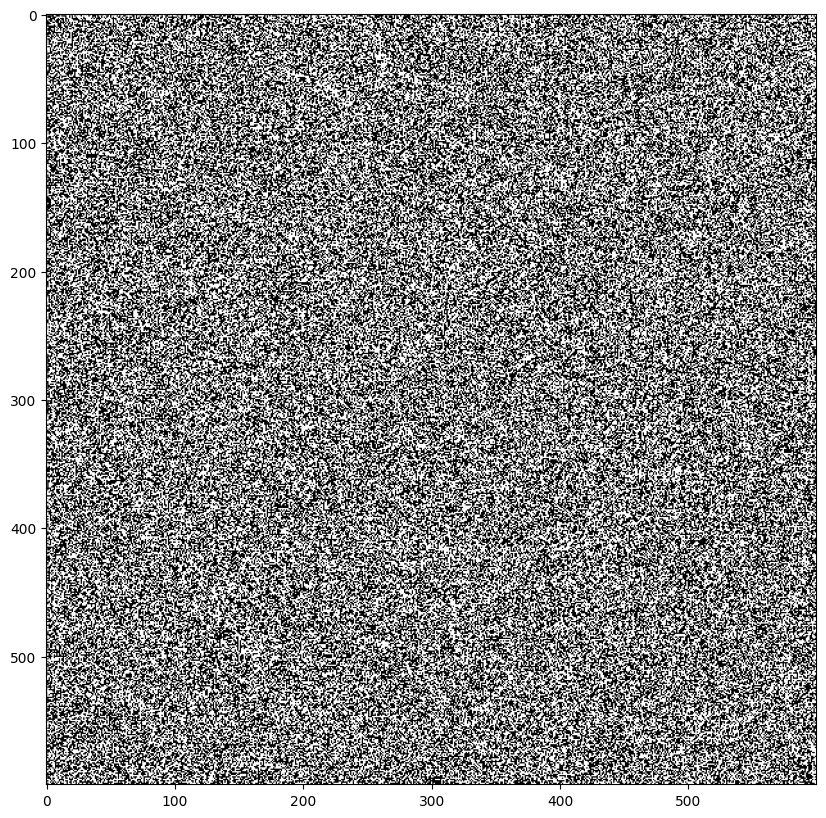

In [20]:
display_img(white_noise)

In [21]:
img.max()

255.0

In [22]:
white_noise = white_noise*255
white_noise

array([[  0, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ..., 255,   0, 255],
       [255,   0,   0, ..., 255, 255,   0],
       ...,
       [  0,   0, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255],
       [255,   0, 255, ...,   0,   0, 255]])

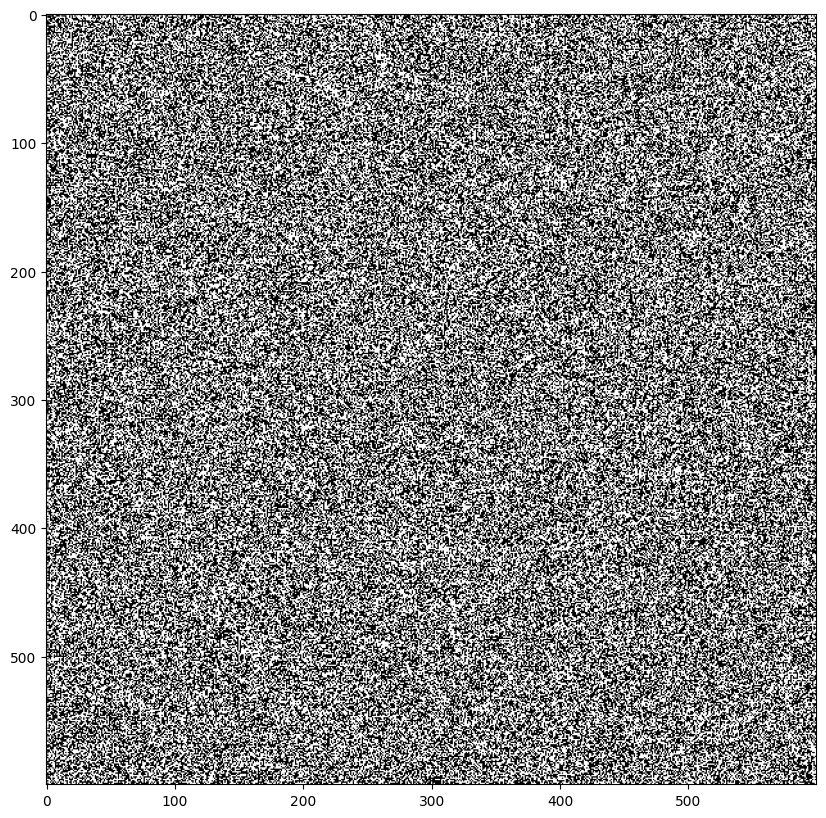

In [23]:
display_img(white_noise)

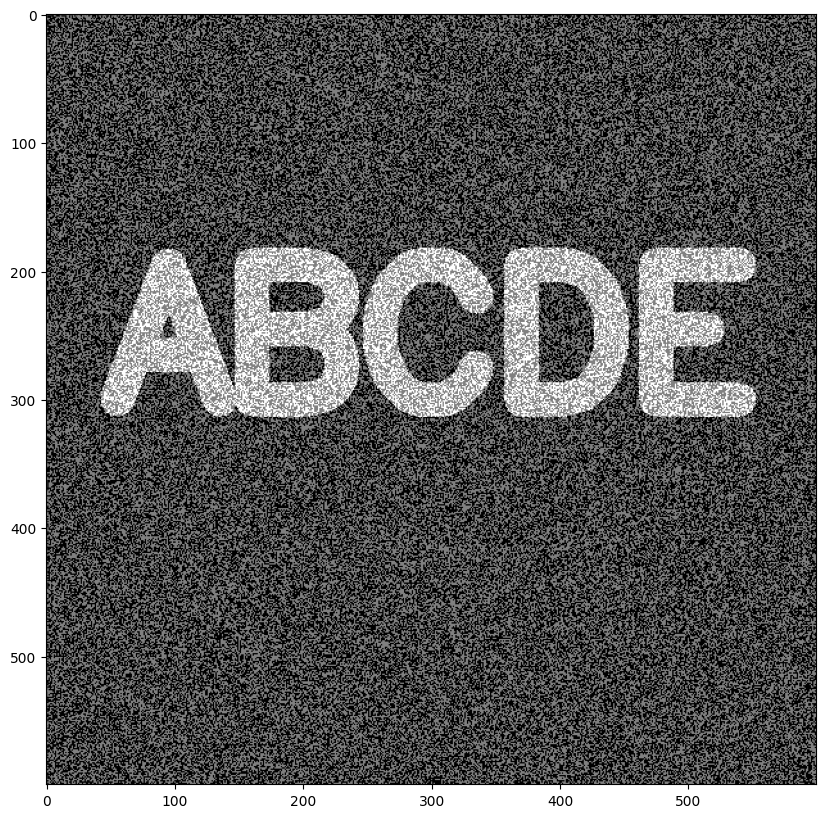

In [24]:
noise_img = white_noise+img
display_img(noise_img)

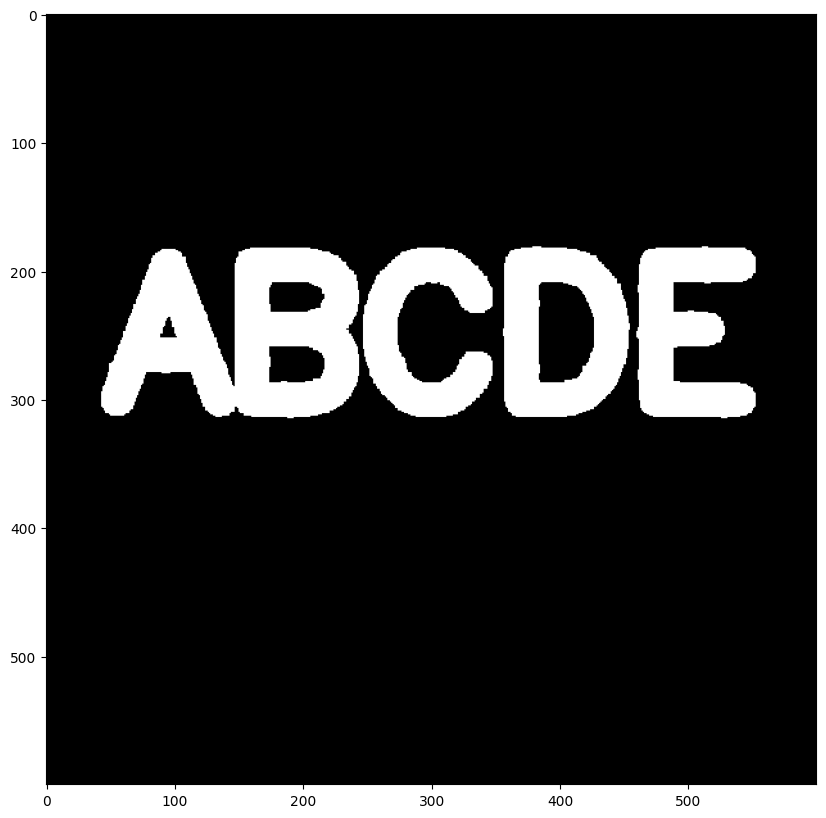

In [25]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)

In [26]:
img = load_img()


In [27]:
black_noise =np.random.randint(low=0,high=2,size=(600,600))
black_noise = black_noise*-255
black_noise

array([[-255,    0,    0, ...,    0, -255,    0],
       [   0,    0,    0, ...,    0, -255, -255],
       [-255,    0,    0, ..., -255,    0,    0],
       ...,
       [-255, -255,    0, ..., -255, -255,    0],
       [   0, -255, -255, ..., -255,    0,    0],
       [   0, -255, -255, ...,    0, -255, -255]])

In [28]:
black_noise_img = img+black_noise
black_noise_img

array([[-255.,    0.,    0., ...,    0., -255.,    0.],
       [   0.,    0.,    0., ...,    0., -255., -255.],
       [-255.,    0.,    0., ..., -255.,    0.,    0.],
       ...,
       [-255., -255.,    0., ..., -255., -255.,    0.],
       [   0., -255., -255., ..., -255.,    0.,    0.],
       [   0., -255., -255., ...,    0., -255., -255.]])

In [29]:
black_noise_img[black_noise_img==-255] =0
black_noise_img.min()

0.0

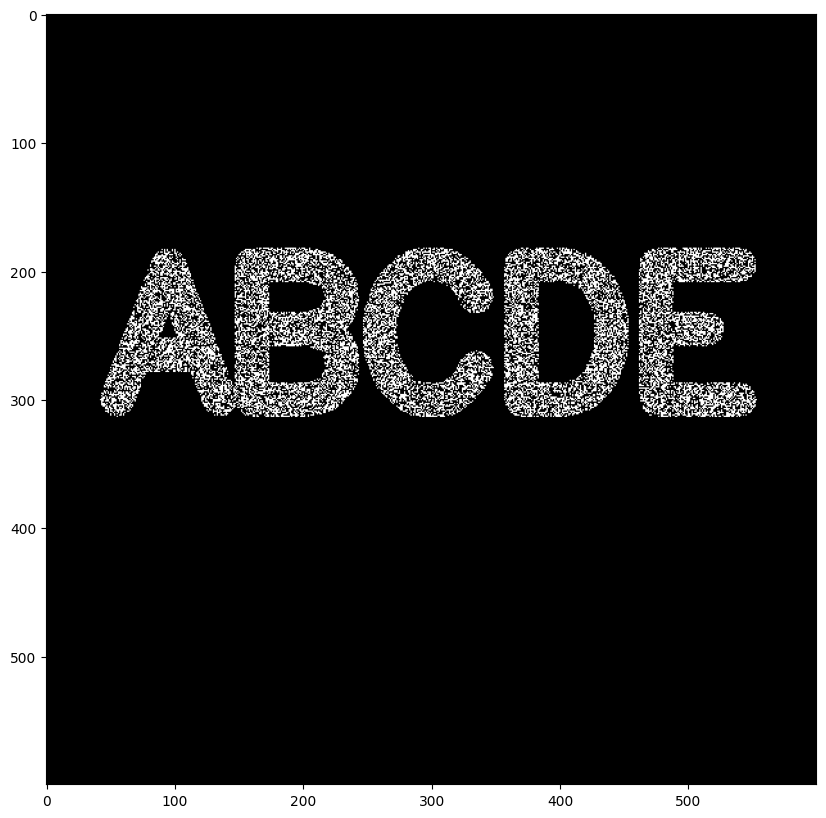

In [30]:
display_img(black_noise_img)

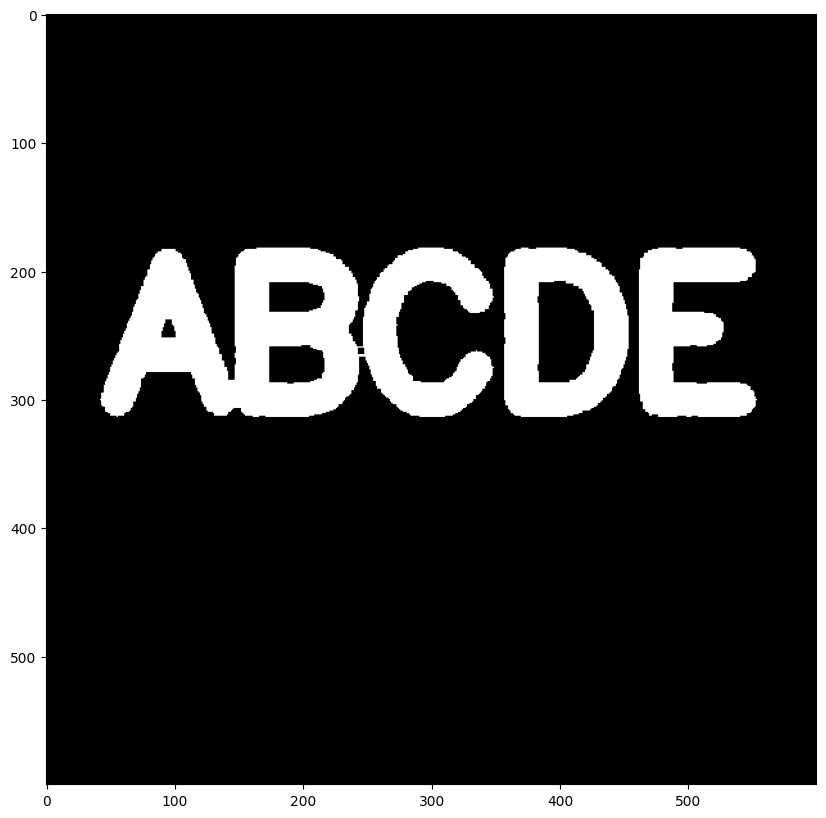

In [31]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

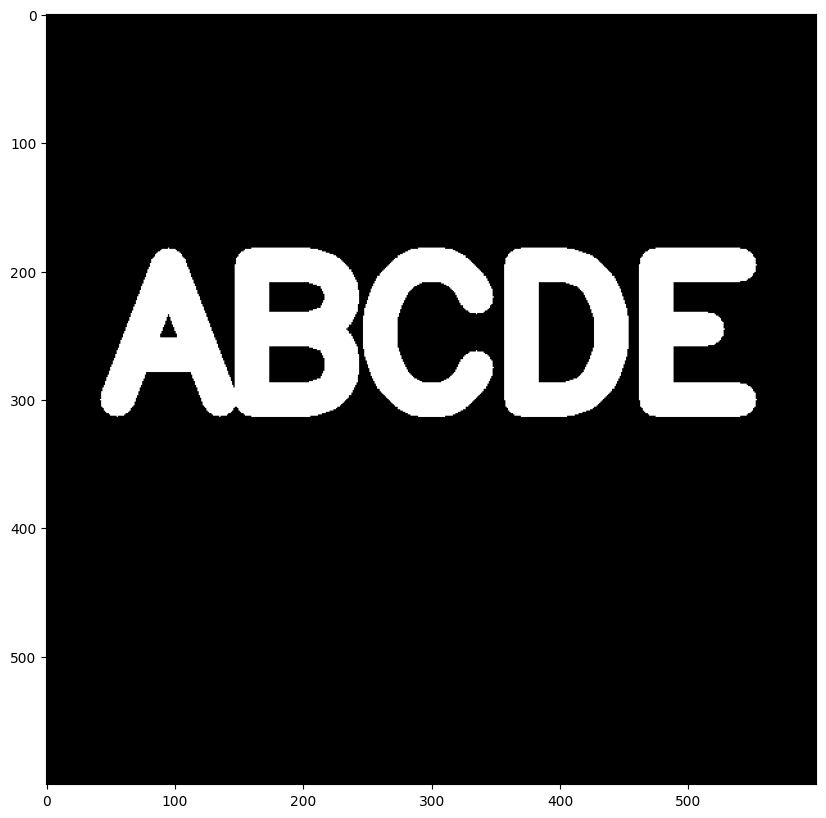

In [32]:
img = load_img()
display_img(img)

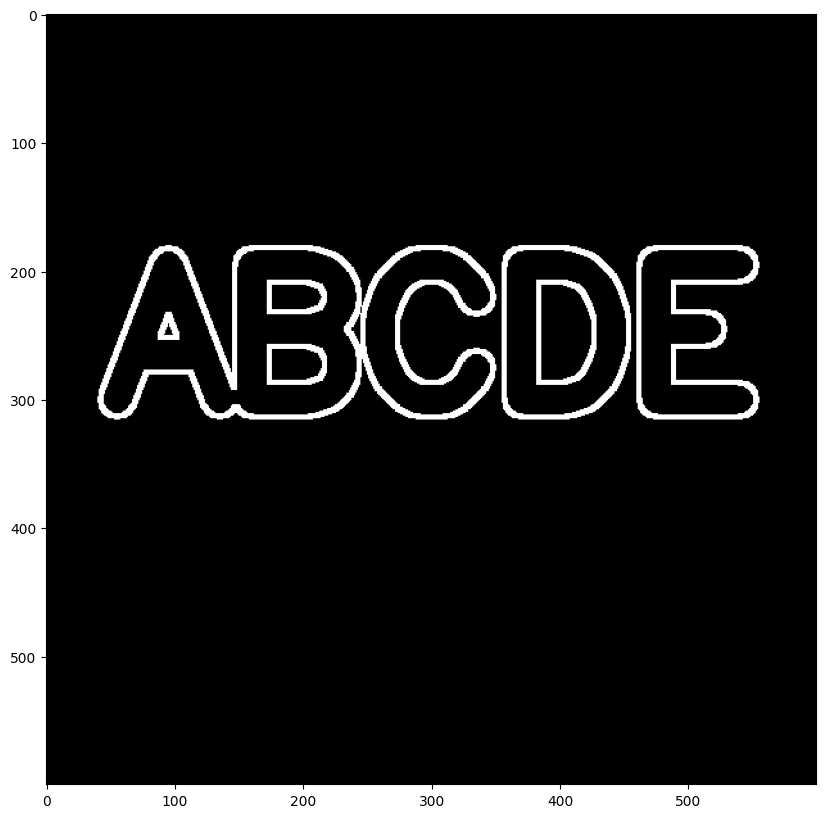

In [33]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)